In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.preprocessing import MinMaxScaler

In [13]:
items = pd.read_csv('db/db.txt', sep="|")
items.index = items['id']

acqs = pd.read_csv('db/comments.txt', sep="|")

In [16]:
# items = pd.read_csv('db/db.txt', sep="|")

# # ---------------------Шаг 0-----------------------Векторы должны храниться------
# dv = DataVector()
# items_vector = dv.get_vector(items)

items_vector = pd.read_csv('db/items_vector.txt', sep="|")
items_vector.index = items_vector['id']
items_vector = items_vector.drop(columns=['id'])
# # -------------------------------------------------------------------------------

# Эту хрень тоже придется хранить
# ------------------------------------Еще один шаг 0--------------------
# uMatrix = UtilityMatrix()
# uMatrix.create_utility_martix(acqs)

um = pd.read_csv('db/user_item_matrix.txt', sep="|")
um.index = um.index+1
um.columns = pd.to_numeric(um.columns) # Возможно, в бдхе преобразовывать не понадобится
uMatrix = UtilityMatrix()
uMatrix.add_ready_martix(um)

0

In [3]:
# *************************************** * * * ** 
class DataVector():
    
    types = ['комбинезон', 'жилет', 'пакет', 'футболка', 'толстовка', 'пуховик',
         'свитер', 'куртка', 'дождевик', 'снуд', 'попона', 'платье', 'шуба', 
         'пальто', 'дубленка', 'костюм', 'пыльник', 'худи', 'плащ', 'халат',
         'майка', 'штаны', 'рубашка', 'сарафан', 'парка', 'косынка', 'повязка']
    
        # -----Fix sex
    sex_types_male = ['самец', 'кабель', 'унисекс', 'мужской', 'мальчик']
    sex_types_female = ['самка', 'сука', 'унисекс', 'женский', 'девочка']
    
    size_types_small = ['мелк', 'все', 'мал']
    size_types_middle = ['средн', 'все', 'небольш']
    size_types_big = ['крупн', 'все', 'больш']
    
    color_types_red = ['красн', 'малин', 'ал', 'бордов', 'кораллов', 'марсала']
    color_types_brown = ['коричнев', 'какао', 'шоколад', 'терракот', 'бронз', 'вин', 'капучино']
    color_types_orange = ['оранж', 'рыж', 'лососев']
    color_types_beige = ['бежев', 'пудров', 'жемчужн', 'кремов', 'персик']
    color_types_yellow = ['желт', 'золот', 'лимон', 'горчичн',]
    color_types_white = ['бел', 'сер', 'серебр', 'прозрачн']
    color_types_black = ['черн', 'графит', 'чернильн']
    color_types_pink = ['роз', 'фиолет', 'сирен', 'лаванд', 'фуксия', 'лилов', 'сумеречн']
    color_types_blue = ['син', 'голуб', 'васильков', 'лазурн', 'электрик']
    color_types_green = ['зелен', 'салат', 'хаки', 'мят', 'оливк', 'изумруд',
                         'бирюз', 'лайм', 'камуфляж']
    
    
    def __get_type(self, typ, template) :
        typ_small = typ.lower()
        for elem in template:
            if typ_small.find(elem) != -1:
                return elem
        return 'unknown'
    
    def __get_type_bool(self, typ, template) :
        typ_small = typ.lower()
        for elem in template:
            if typ_small.find(elem) != -1:
                return 1
        return 0
    
    def __get_type_color(self, typ) :
        typ_small = typ.lower()
        for elem in self.color_types_blue:
            if typ_small.find(elem) != -1:
                return 'синий'
        for elem in self.color_types_pink:
            if typ_small.find(elem) != -1:
                return 'розовый'
        for elem in self.color_types_white:
            if typ_small.find(elem) != -1:
                return 'белый'     
        for elem in self.color_types_red:
            if typ_small.find(elem) != -1:
                return 'красный'
        for elem in self.color_types_black:
            if typ_small.find(elem) != -1:
                return 'черный'
        for elem in self.color_types_orange:
            if typ_small.find(elem) != -1:
                return 'оранжевый'   
        for elem in self.color_types_green:
            if typ_small.find(elem) != -1:
                return 'зеленый'
        for elem in self.color_types_yellow:
            if typ_small.find(elem) != -1:
                return 'желтый'
        for elem in self.color_types_brown:
            if typ_small.find(elem) != -1:
                return 'коричневый'   
        for elem in self.color_types_beige:
            if typ_small.find(elem) != -1:
                return 'бежевый'          

        return 'unknown'
    
    
    # Функция для генерации вектора
    def get_vector(self, items_matrix):
        
        sc = MinMaxScaler()
        items_matrix[['Price']] = sc.fit_transform(items_matrix[['Price']])

        d = {'brand': items_matrix['Brand'], 'price': items_matrix['Price']}
        items_int = pd.DataFrame(data=d)

        items_int[['type']] = items_matrix.apply(lambda x: self.__get_type(str(x['Type']), self.types), axis=1)

        items_int[['sex_male']] = items_matrix.apply(lambda x: self.__get_type_bool(str(x['Sex']), self.sex_types_male), axis=1)
        items_int[['sex_female']] = items_matrix.apply(lambda x: self.__get_type_bool(str(x['Sex']), self.sex_types_female), axis=1)

        items_int[['size_small']] = items_matrix.apply(lambda x: self.__get_type_bool(str(x['Size']), self.size_types_small), axis=1)
        items_int[['size_middle']] = items_matrix.apply(lambda x: self.__get_type_bool(str(x['Size']), self.size_types_middle), axis=1)
        items_int[['size_big']] = items_matrix.apply(lambda x: self.__get_type_bool(str(x['Size']), self.size_types_big), axis=1)

        items_int[['color']] = items_matrix.apply(lambda x: self.__get_type_color(str(x['Color'])), axis=1)
        

        res = pd.get_dummies(items_int)

        if 'color_unknown' in res.columns:
            res = res.drop(['color_unknown'], axis=1)
        if 'type_unknown' in res.columns:
            res = res.drop(['type_unknown'], axis=1)    
            
        res.index = items_matrix['id']    

        return res
        

In [4]:
# ************************************** * * * * ** * * *
# Фигачим класс для высчитывания ближайших значений

class GetKNearestNeighbours:
    
    def __init__(self, X_matrix, X_ids=[]):
        self._X_matrix = X_matrix
        self.df = pd.DataFrame({
            'id': pd.Series(X_ids, dtype='int'),
            'dist': pd.Series([], dtype='float'),
        })
        self.similarity_matrix = pd.DataFrame()
        
       
    def neighbours_for_single_object(self, K: int, X_matrix_object):
        
        dist = cosine_similarity(self._X_matrix, X_matrix_object)
        dist = pd.DataFrame(dist, columns=['dist'])
        self.df['dist'] = dist['dist']
        res = self.df.sort_values(by='dist', ascending=False)
        res = res.head(K)
#         res = res[1:]
        return res
    

    def all_neighbours_for_single_object(self, X_matrix_object):
        
        dist = cosine_similarity(self._X_matrix, X_matrix_object)
        dist = pd.DataFrame(dist, columns=['dist'])
        self.df['dist'] = dist['dist']
        return self.df
    
    
    def get_similarity_matrix(self):
        self.similarity_matrix = pd.DataFrame()
        for i in range (len(self._X_matrix)):
            print(i, end='\r')
            res = self.all_neighbours_for_single_object([self._X_matrix.iloc[i]])
            self.similarity_matrix[i+1] = res['dist']
          
        self.similarity_matrix.index = self.df['id']
        print('\n----------------------\nReady\n')  
        
        
     # Получаем похожих по матрице схожести
    def neighbours_by_similarity_matrix(self, K, item_id):
        if item_id > len(self.similarity_matrix):
            return ''
        res = pd.DataFrame({'dist':self.similarity_matrix[item_id]})
        res = res.sort_values(by='dist', ascending=False)
        res = res.head(K)
        return res[1:]       
        

### ------------------------------------------------------------------------- Похожие ----------------------------------------------

In [5]:
# ---------------------Шаг 1-----------------------Выдача похожих товаров
# это буквально все, что нужно, при наличии items_vector

def Get_Simple_Items(items_vector_matrix, item_id, K):
    if item_id not in items_vector_matrix.index:
        return []
    getKnn = GetKNearestNeighbours(items_vector_matrix, items_vector_matrix.index) # Класс ближайших
    res = getKnn.neighbours_for_single_object(K, [items_vector_matrix.loc[item_id]])
    res = res[1:]
    return list(res['id'])

# -------------------------------------------------

In [17]:
%%time
simple_items = Get_Simple_Items(items_vector, 20, 10)

CPU times: user 43.4 ms, sys: 0 ns, total: 43.4 ms
Wall time: 29.3 ms


### ------------------------------------------------------------------------- Рекомендации ----------------------------------------------

#### ---------------------------------------------------- User-Based -------------------------------------

In [7]:
# ******************************** * * * * * 
# Матрица схожести по списку покупок 

class UtilityMatrix():

    def create_utility_martix(self, data):

        userList = data['userId'].tolist()
        itemList = data['itemId'].tolist()

        userList = list(set(userList))
        itemList = list(set(itemList))
        itemList.sort()

        X = pd.DataFrame({item: [0 for i in range(len(userList))] for item in itemList})
        X.index = userList

        number = 0
        for i, row in data.iterrows():
            print (i, end='\r')
            X[row['itemId']][row['userId']] = 1
            number+=1
        self.matrix = X    
        print('added items = ', number)
        
        
    def add_ready_martix(self, data): 
        self.matrix = data.copy()
        return 0
        
        
    def add_bought(self, item_id, user_id):   
        try:
            self.matrix[item_id][user_id] = 1
        finally:
            return 0
        return 0
    
    
    def new_user(self, user_id):
        try:
            if user_id not in self.matrix.index:
                new_row = pd.Series([0]*len(self.matrix.columns))
                new_row.index = self.matrix.columns

                index_list = list(self.matrix.index)
                index_list.append(user_id)

                self.matrix = self.matrix.append(new_row, ignore_index=True)
                self.matrix.index = index_list  
                return 0
        finally:
            return 0

In [8]:
# ************************************* * * * * *
# Класс ближайших пользователей
class GetKNearestUsers(GetKNearestNeighbours):
    
    def __init__(self, X_matrix, X_ids=[]):
        super().__init__(X_matrix, X_ids)
       
    
    def neighbours_for_single_user(self, K: int, X_matrix_object):
        
        res = self.neighbours_for_single_object(K, X_matrix_object) #индекс, не айдишник (с 0)
        res = res.drop(res[res.dist==0].index) #Убираем пользователей с расстоянием 0
        return res

In [9]:
# ********************************** * * ** 
# Функция для выковыривания товаров пользователя

def get_all_items_of_one_user(user_id, acqs_data):
    comms = acqs_data['userId'][acqs_data['userId']==user_id]
    items_list = []
    for com in comms.index:
        items_list.append(acqs_data['itemId'][com])
    return items_list  

In [10]:
# ******************** * ** * ** ** * Список рекомендуемых товаров для пользователя

def Get_K_UserBased(user_id, K, u_i_matrix, acqq_matrix):
    
    if user_id not in u_i_matrix.index:
        return []
    
    getKnnUsers = GetKNearestUsers(u_i_matrix, u_i_matrix.index)
    res = getKnnUsers.neighbours_for_single_user(K+1, [u_i_matrix.loc[user_id]]) # айдишник  
    
    similar_users = res['id'].values.tolist()
    if user_id in similar_users:
        similar_users.remove(user_id)
    
    
    items_for_user = []
    
    for one_sim_user_id in similar_users:   
        if one_sim_user_id == 0:
            continue
        items_for_user.extend(get_all_items_of_one_user(one_sim_user_id, acqq_matrix))
        
        
    if len(items_for_user) == 0:
        return []


    items_set = list(set(items_for_user))
    items_arr = []
    for i in items_set:
        items_arr.append([i, items_for_user.count(i)])

    df = pd.DataFrame(items_arr, columns=['itemId', 'koef'])
    df['koef'] = df['koef']/K
    df = df.sort_values(by='koef', ascending=False)

    return list(df['itemId'])

In [11]:
## ---------------------------------------------Получаем список товаров для пользователя
# %%time
user_id = 8
Get_K_UserBased(user_id, 15, uMatrix.matrix, acqs)

NameError: name 'uMatrix' is not defined

#### ---------------------------------------------------- Content-Based -------------------------------------

In [12]:
# ********************************************** * * * *

def Get_K_PersonalContentBased(user_id, K, items_vector_matrix, acqq_matrix):
    
    getKnnItemsCB = GetKNearestNeighbours(items_vector_matrix, items_vector_matrix.index)
    user_boughts = get_all_items_of_one_user(user_id, acqq_matrix)
     
    i_list = []
    for one_item_id in user_boughts:
        i_list.append(list(items.loc[one_item_id]))
    i_list_df = pd.DataFrame(i_list)    
    i_list_df.index = user_boughts
    i_list_df.columns = items.columns
    
    
    dv = DataVector()     
    i_list_vector = dv.get_vector(i_list_df) #Превратили в вектор
        
    personal_user_vector = []
    for col in items_vector.columns:
        if col not in i_list_vector.columns:
            personal_user_vector.append(0)
        else:       
            val = round(i_list_vector[col].sum()/len(i_list_vector[col]), 3)
            personal_user_vector.append(val)
                             
    res = getKnnItemsCB.neighbours_for_single_object(K, [personal_user_vector])         
    return list(res['id'])  

In [18]:
%%time
user_id = 8
res = Get_K_PersonalContentBased(user_id, 90, items_vector, acqs)
res

CPU times: user 181 ms, sys: 11.5 ms, total: 193 ms
Wall time: 183 ms


[20,
 34,
 531,
 740,
 1663,
 1746,
 256,
 108,
 33,
 99,
 88,
 52,
 79,
 25,
 1222,
 1108,
 302,
 1104,
 211,
 1554,
 301,
 331,
 607,
 775,
 349,
 800,
 1694,
 573,
 326,
 1614,
 713,
 1077,
 706,
 1391,
 739,
 2255,
 114,
 50,
 896,
 149,
 386,
 337,
 629,
 1465,
 1807,
 1801,
 1800,
 526,
 1038,
 1752,
 1760,
 441,
 625,
 1511,
 634,
 1340,
 1064,
 917,
 1767,
 545,
 1098,
 1816,
 852,
 1078,
 1540,
 1508,
 2012,
 2018,
 189,
 818,
 156,
 2270,
 1164,
 2015,
 2021,
 168,
 125,
 39,
 432,
 1050,
 104,
 87,
 1549,
 105,
 355,
 77,
 107,
 210,
 308,
 475]

### ------------------------------------------------ Проверяем коэффициенты ----------------------------------

In [166]:
from sklearn.metrics import f1_score 

def count_f1_score(true_matrix, item_list, user_id):
        
    f1_sc = 0
    if len(item_list)>0:
        pred_matrix = pd.DataFrame({item: [0] for item in true_matrix.columns})
            
        for iitem in item_list:
            if iitem in pred_matrix.columns:
                pred_matrix[iitem][0] = 1

        f1_sc = f1_score(true_matrix.iloc[user_id], pred_matrix.iloc[0])
       
    return f1_sc


In [173]:
from sklearn.metrics import precision_score

def count_MOR_score(true_matrix, item_list, user_id):
    
        ap_k = 0
        KK = min(10, len(item_list)) 
        
        if KK>0:
            ap_k_sum = 0 # Для одного пользователя - НЕ МЕРА, ТОЛЬКО СУММА
            for _k_id in range(KK):
                _k = _k_id+1    
                if item_list[_k_id] in true_matrix.columns and list(true_matrix[item_list[_k_id]])[user_id] == 1:

                    first_k = item_list[0:_k]
                    first_k_row = pd.DataFrame({item: [0] for item in true_matrix.columns})
            
                    for iitem in first_k:
                        first_k_row[iitem][0] = 1
                    p_k = precision_score(true_matrix.iloc[user_id], first_k_row.iloc[0])
                    ap_k_sum+=p_k
                    
            ap_k = ap_k_sum/KK 
            
        return ap_k   

In [174]:
from sklearn.metrics import recall_score

def count_recall_score(true_matrix, item_list, user_id):


        
        recall_sc = 0
        if len(item_list)>0:
            pred_matrix = pd.DataFrame({item: [0] for item in true_matrix.columns})
            
            for iitem in item_list:
                if iitem in true_matrix.columns:
                    pred_matrix[iitem][0] = 1
            recall_sc = recall_score(true_matrix.iloc[user_id], pred_matrix.iloc[0])
        return recall_sc

In [149]:
koef_UB = 0.6
koef_CB = 1 - koef_UB
result = Range_Recoms(recoms_UB, recoms_CB, koef_UB, koef_CB)

### ------------------------------------------ Test -----------------------------

In [218]:
# Скажем, что мор где-то 0.18181777223261942, а рекол 0.9894541484716161

In [1]:
res_data=[
    [0.4, 0.14254532677225482],
    [0.5, 0.17997452692867549],
    [0.6, 0.18181777223261942],
    [0.7, 0.18181777223261942],
    [0.8, 0.18181777223261942],
    [0.9, 0.18181777223261942],
]

In [5]:
df = pd.DataFrame(res_data, columns=['UserBased_koef', 'MAP@K'])

In [6]:
df

,UserBased_koef,MAP@K
0,0.4,0.142545
1,0.5,0.179975
2,0.6,0.181818
3,0.7,0.181818
4,0.8,0.181818
5,0.9,0.181818


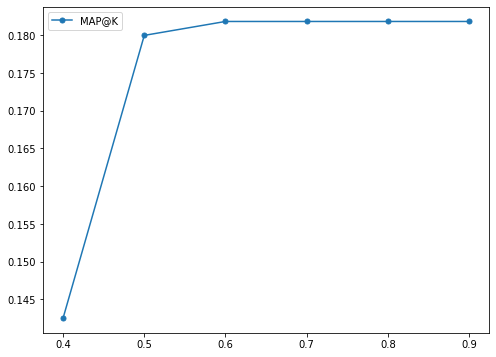

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(df['UserBased_koef'], df['MAP@K'], 
        label='MAP@K', 
        marker = 'o',
        markersize = 5)

fig.set_figwidth(8)
fig.set_figheight(6)

plt.legend()
plt.show()

### ---------------------------------- Сбор рекомендаций --------------------------------------

In [22]:
# ********************************** * * * ** * *** * **  *

def Range_Recoms(recoms_UB, recoms_CB, koef_UB=0.6, koef_CB=0.4):
    recoms_df = {}
    for i in range(len(recoms_CB)):
        koef = (1-(i//5)*0.05) * koef_CB
        recoms_df.setdefault(recoms_CB[i], koef)
    for i in range(len(recoms_UB)):
        item = recoms_UB[i]

        if recoms_df.get(item) == None:
            recoms_df.setdefault(item, 1 * koef_UB)
        else:
            koef_new = recoms_df.pop(item)
            koef_new += 1 * koef_UB
            recoms_df.setdefault(item, koef_new)  
            
    return(recoms_df)        

In [77]:
# Range_Recoms(recoms_UB, recoms_CB)

In [41]:
%%time
user_id = 15

recoms_UB = Get_K_UserBased(user_id, 15, uMatrix.matrix, acqs)
recoms_CB = Get_K_PersonalContentBased(user_id, 90, items_vector, acqs)

CPU times: user 1.16 s, sys: 304 ms, total: 1.47 s
Wall time: 875 ms


In [19]:
uMatrix.new_user(13000)

0

In [ ]:
user_id = 8

In [23]:
u_items = get_all_items_of_one_user(user_id, acqs)
u_items

[]

In [ ]:
# Если пользователь что-то покупал, идем по обычной схеме, получаем рекомендации. 
# В функции ранжирования - если товаров 100, то все, иначе берем 100 популярных и проходимся рангом по ним

# Если не покупал, берем 10 похожих на текущий товар + 100 популярных (отранговать)

# Потом в итоге откусить первые 100.

In [24]:
# Находим 100 самых популярных (потом в бд сделаем нормально)
ui_matrix_trans = uMatrix.matrix.copy()
ui_matrix_trans = ui_matrix_trans.T
ui_matrix_trans['total'] = ui_matrix_trans.sum(axis=1)
ui_matrix_trans = ui_matrix_trans.sort_values(by='total', ascending=False)
popular = list(ui_matrix_trans.index)[0:100]

In [20]:
# ******************************************** * * * * * * * ***************
# Я даже удаляю то, что он уже купил
def Get_N_Reccomendations(user_id, acqs_data, N=100, item_id=-1):
    
    users_bought = get_all_items_of_one_user(user_id, acqs_data)
    if len(users_bought) > 0:
        
        recoms_UB = Get_K_UserBased(user_id, 15, uMatrix.matrix, acqs_data) # передаем все, кроме того, что берем из бд
        recoms_CB = Get_K_PersonalContentBased(user_id, 90, items_vector, acqs_data)
        recoms_ranged = Range_Recoms(recoms_UB, recoms_CB)
                   
    else:
        recoms_CB_thisItem = []
        if item_id != -1:
            recoms_CB_thisItem.extend(Get_Simple_Items(items_vector, item_id, 21))
        
        recoms_ranged = {}
        for i in recoms_CB_thisItem:
            recoms_ranged.setdefault(i, 0.6)

    
    if len(recoms_ranged) < 100:
        
        koef_POP = 0.1
        pop_list = popular
        for i in range(len(pop_list)):
            pop_item = pop_list[i]
            if recoms_ranged.get(pop_item) == None:
                recoms_ranged.setdefault(pop_item, 1 * koef_POP)
            else:
                koef_new = recoms_ranged.pop(pop_item)
                koef_new += 1 * koef_POP
                recoms_ranged.setdefault(pop_item, koef_new)  
                
    result = list(sorted(recoms_ranged, key=recoms_ranged.get, reverse=True))[0:N+len(users_bought)]  
    for r_item in users_bought:
        if r_item in result:
            result.remove(r_item)
            
    return result 

In [25]:
res = Get_N_Reccomendations(1, acqs, 100, 1)
list(res)

[23,
 37,
 180,
 55,
 793,
 203,
 1,
 584,
 1461,
 216,
 1735,
 894,
 1283,
 1500,
 131,
 1942,
 1786,
 1787,
 1668,
 1802,
 1033,
 1117,
 2093,
 2095,
 2084,
 783,
 910,
 2286,
 1687,
 259,
 1833,
 1749,
 610,
 1765,
 234,
 1281,
 715,
 347,
 644,
 2017,
 1640,
 936,
 867,
 231,
 726,
 342,
 452,
 1393,
 1797,
 1682,
 1008,
 538,
 1460,
 1699,
 1049,
 1982,
 1977,
 1094,
 1434,
 122,
 1613,
 1145,
 325,
 1562,
 126,
 427,
 1199,
 413,
 1908,
 1503,
 292,
 1398,
 1849,
 1203,
 2111,
 1998,
 1773,
 764,
 2190,
 20,
 26,
 52,
 61,
 2,
 15,
 108,
 8,
 3,
 4,
 36,
 31,
 12,
 85,
 233,
 65,
 101,
 106,
 19,
 70,
 5]

### ---------------------------------- Пытаемся собрать данные ---------------

In [ ]:
# User, Recoms_list, need_update
# флаг везде = 0, становится 1, когда покупаем или логинимся
# (обработка логина идет отдельно с добавлением записи в эту таблицу)

In [106]:
# list_with_users_and_their_recoms = []
# users_ids_list = uMatrix.matrix.index

for i in range (1, 12449):    
    print(i, end='\r')
    
    res = Get_N_Reccomendations(i, acqs, item_id=-1)
    recoms_str = ''
    for rec_item in res:
        recoms_str+=(str(rec_item) + ';')

    list_with_users_and_their_recoms.append([i, recoms_str, 0])    

In [140]:
len(list_with_users_and_their_recoms)

12399

In [139]:
list_with_users_and_their_recoms=list_with_users_and_their_recoms[50:12449]

In [111]:
# df = pd.DataFrame(list_with_users_and_their_recoms, columns=['userId', 'recoms', 'need_update'])

In [147]:
# df = df.drop(df[df.index<51].index)
len(df.index)

12448

In [148]:
df.head(10)

,userId,recoms,need_update
51,1,23;37;180;55;793;203;1;584;1461;216;1735;894;1...,0
52,2,2;164;202;205;148;330;1425;604;1548;889;2281;6...,0
53,3,793;37;180;1461;584;203;295;1393;259;910;1117;...,0
54,4,672;1912;133;1986;338;805;1058;1551;757;657;19...,0
55,5,754;515;115;1236;1701;1616;1923;1105;1421;486;...,0
56,6,23;180;55;188;91;203;584;1461;1942;338;318;166...,0
57,7,65;48;46;52;12;105;20;545;165;256;108;1435;166...,0
58,8,36;90;832;108;52;25;34;531;740;1663;1746;256;3...,0
59,9,89;409;707;887;399;1030;1599;272;542;572;768;5...,0
60,10,52;108;46;105;531;79;99;33;88;34;1767;156;1746...,0


In [160]:
# res = Get_N_Reccomendations(2, acqs, item_id=-1)

In [151]:
df2 = df.copy()

In [154]:
# df2.index = df2['userId']
ii = df2['userId']

In [156]:
df2 = df2.drop(columns = 'userId')

In [157]:
df2

,recoms,need_update
userId,,
1,23;37;180;55;793;203;1;584;1461;216;1735;894;1...,0
2,2;164;202;205;148;330;1425;604;1548;889;2281;6...,0
3,793;37;180;1461;584;203;295;1393;259;910;1117;...,0
4,672;1912;133;1986;338;805;1058;1551;757;657;19...,0
5,754;515;115;1236;1701;1616;1923;1105;1421;486;...,0
...,...,...
12444,175;414;1375;350;293;492;481;599;167;261;395;1...,0
12445,14;4;67;149;1937;1615;779;1261;975;1403;1915;1...,0
12446,70;606;39;432;50;526;961;1657;624;1164;87;104;...,0


In [161]:
df2.to_csv('user_recomendations.csv', sep='|')